In [44]:
from ast import literal_eval
from itertools import chain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df_train = pd.read_csv('../data/raw/birdsong-recognition/train.csv')
df_test = pd.read_csv('../data/raw/birdsong-recognition/test.csv')

In [4]:
print(len(df_train))
print(len(df_test))

21375
3


In [6]:
df_train.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [7]:
df_test.head()

,site,row_id,seconds,audio_id
0,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_5,5,0a997dff022e3ad9744d4e7bbf923288
1,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,10,0a997dff022e3ad9744d4e7bbf923288
2,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_15,15,0a997dff022e3ad9744d4e7bbf923288


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

## Technical audio features

### channels

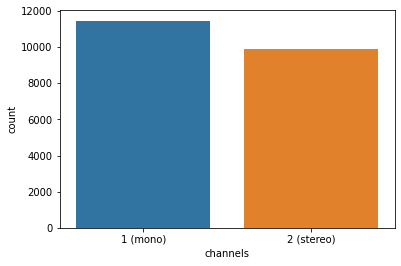

In [14]:
sb.countplot(df_train['channels'])

### duration

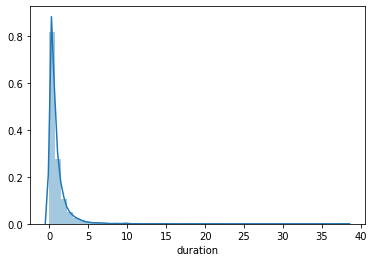

In [30]:
sb.distplot(df_train['duration'] / 60)

### sampling_rate

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

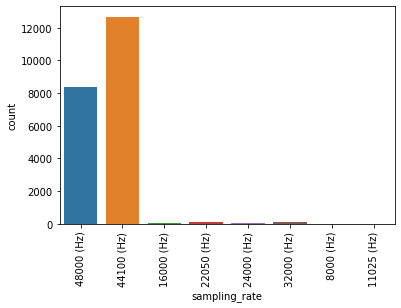

In [78]:
sb.countplot(df_train['sampling_rate'])
plt.xticks(rotation=90);

### bitrate_of_mp3

In [87]:
df_train['bitrate_of_mp3'].value_counts()

128000 (bps)    11589
320000 (bps)     2850
192000 (bps)     2511
256000 (bps)      507
96000 (bps)       392
                ...  
94479 (bps)         1
116485 (bps)        1
170021 (bps)        1
88916 (bps)         1
72552 (bps)         1
Name: bitrate_of_mp3, Length: 2583, dtype: int64

### file_type

In [90]:
df_train['file_type'].value_counts()

mp3    21367
wav        6
mp2        1
aac        1
Name: file_type, dtype: int64

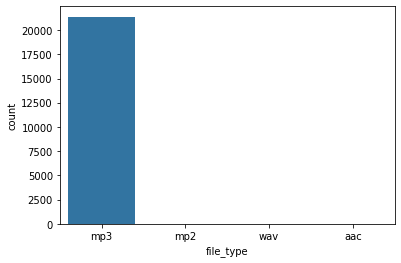

In [89]:
sb.countplot(df_train['file_type'])

### length

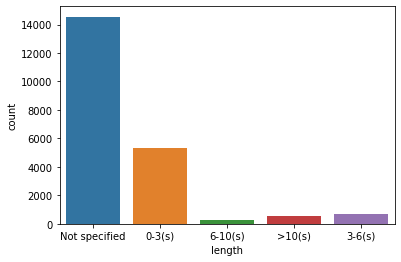

In [61]:
sb.countplot(df_train['length'].fillna('Null'))

## Observation audio features

### pitch

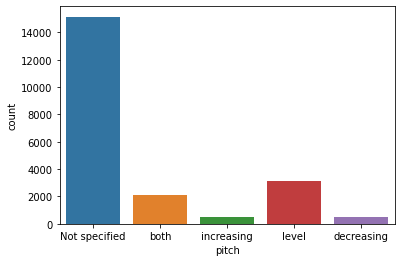

In [33]:
sb.countplot(df_train['pitch'])

### speed

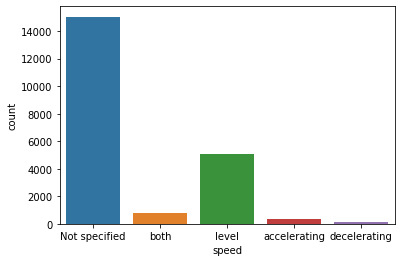

In [34]:
sb.countplot(df_train['speed'])

### volume

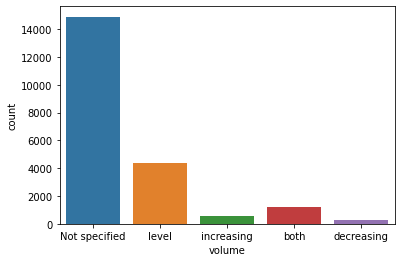

In [52]:
sb.countplot(df_train['volume'])

### number_of_notes

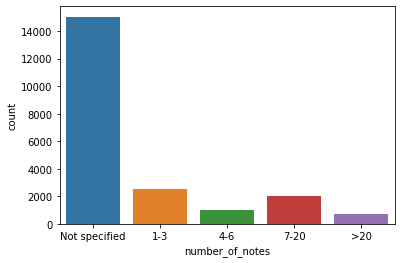

In [40]:
sb.countplot(df_train['number_of_notes'])

## Observation location features

### country

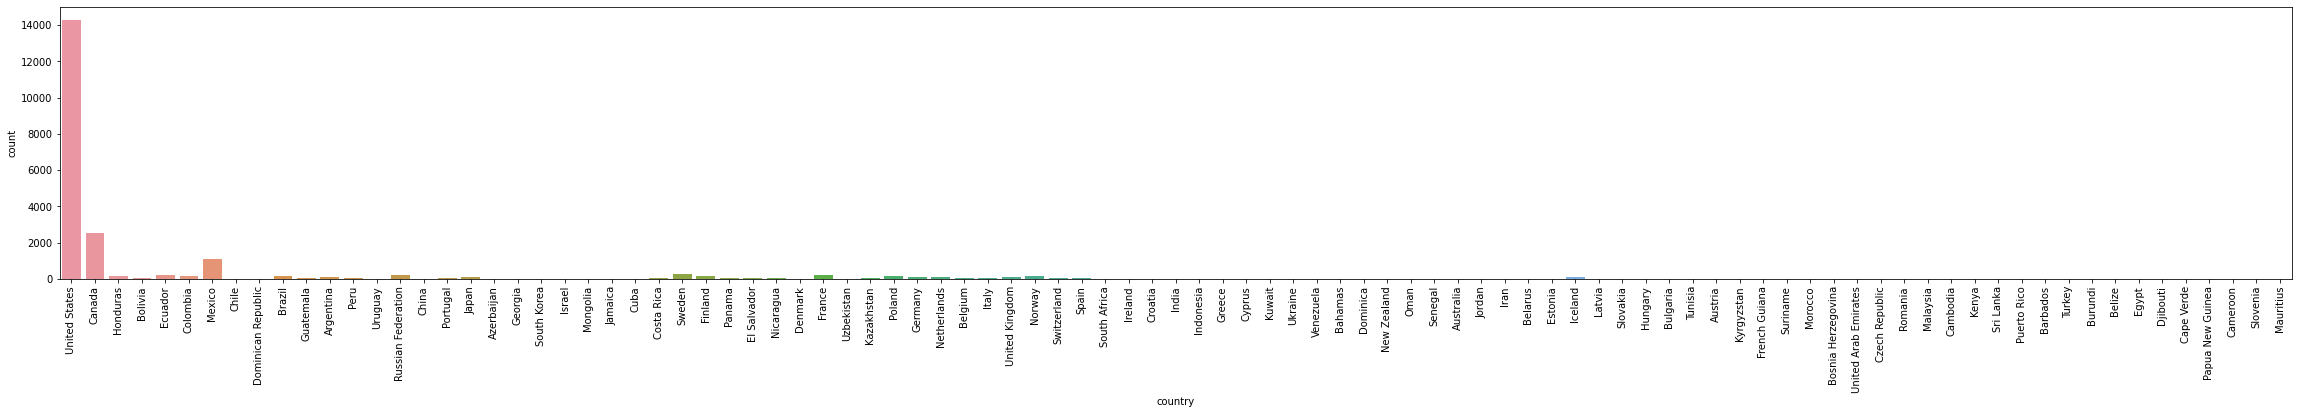

In [66]:
plt.figure(figsize=(40, 5))
sb.countplot(df_train['country']);
plt.xticks(rotation=90);

### location

In [68]:
df_train['location'].head()

0          Grey Cloud Dunes SNA, Washington, Minnesota
1     Carver's Gap Parking area, Roan Mountain Stat...
2     Carver's Gap Parking area, Roan Mountain Stat...
3     Carver's Gap Parking area, Roan Mountain Stat...
4     Carver's Gap Parking area, Roan Mountain Stat...
Name: location, dtype: object

### latitude

### longitude

### elevation

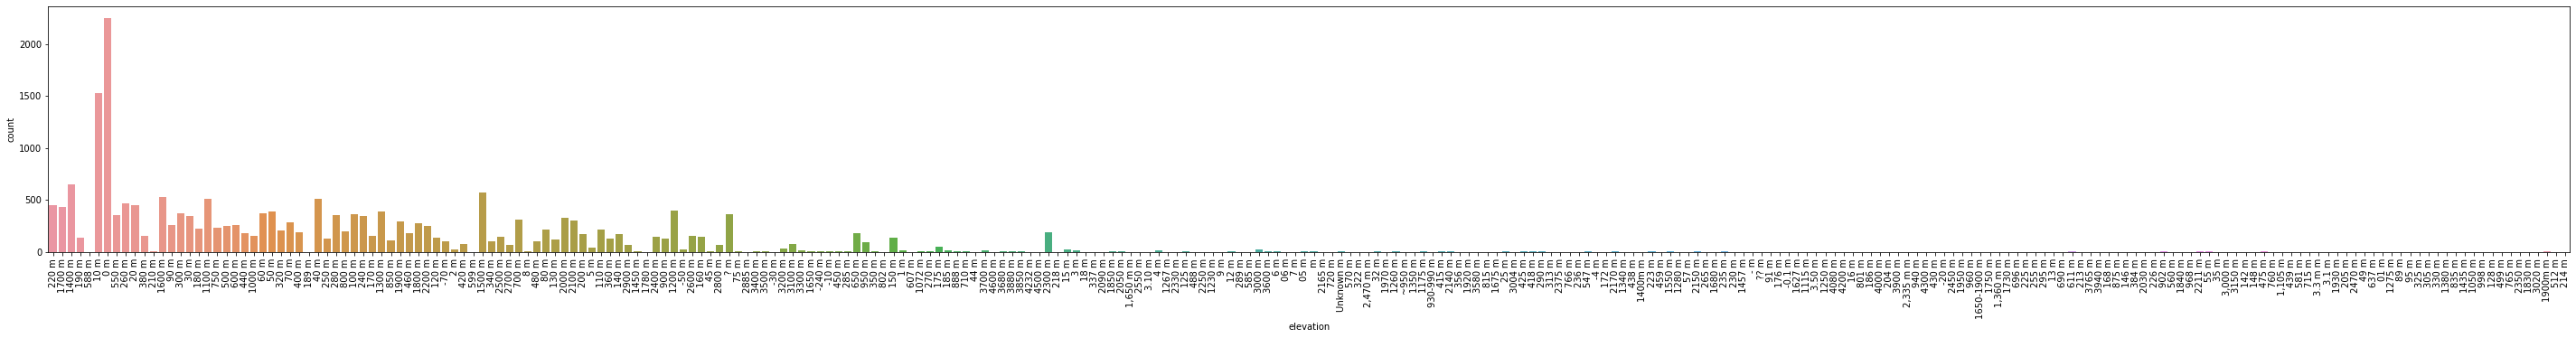

In [75]:
plt.figure(figsize=(50, 5))
sb.countplot(df_train['elevation'])
plt.xticks(rotation=90);

### rating

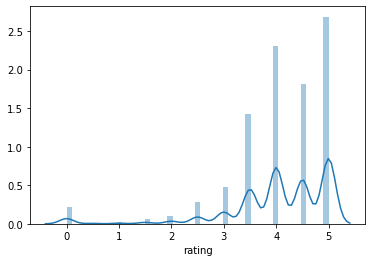

In [15]:
sb.distplot(df_train['rating'])

### bird_seen

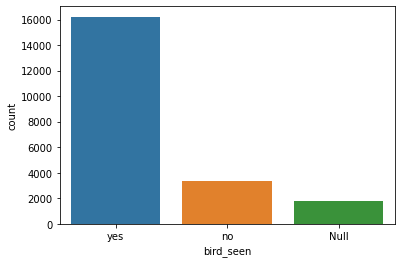

In [27]:
sb.countplot(df_train['bird_seen'].fillna('Null'))

## Labels

### primary_label

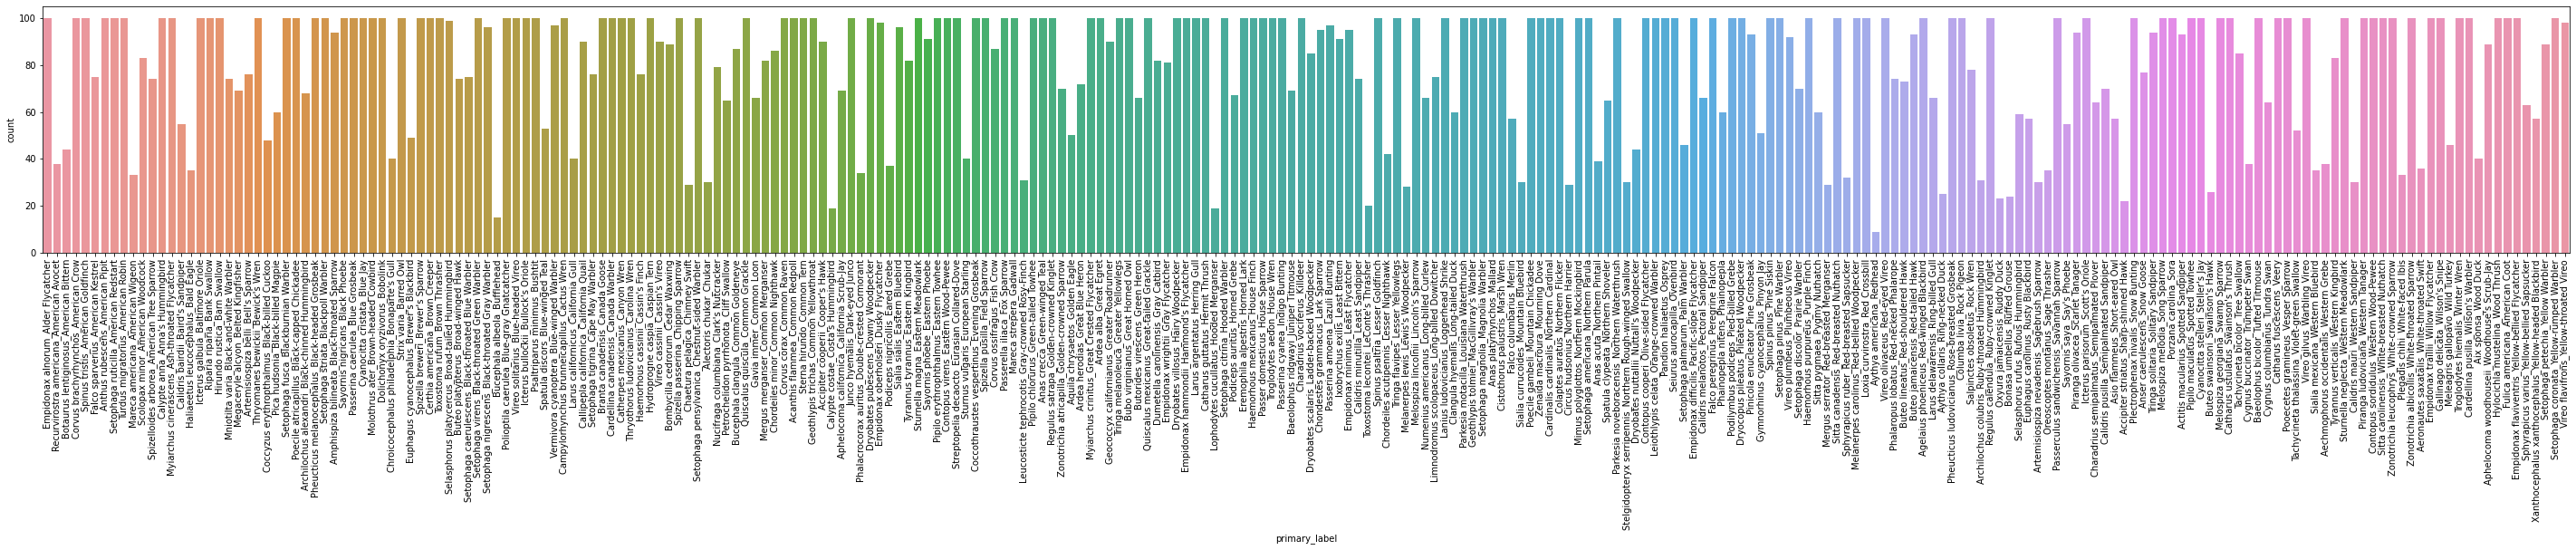

In [63]:
plt.figure(figsize=(50, 5))
sb.countplot(df_train['primary_label'])
plt.xticks(rotation=90);

### secondary_labels

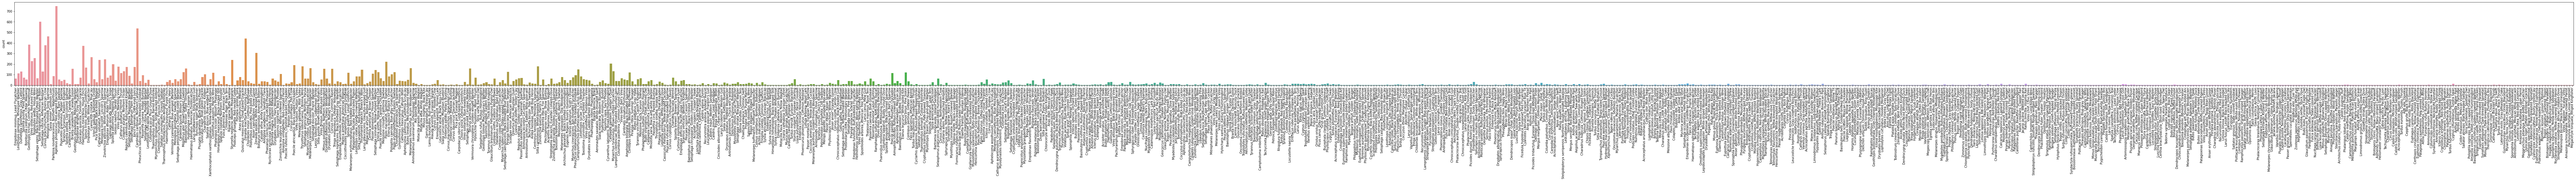

In [51]:
plt.figure(figsize=(150, 5))
secondary_labels = list(chain(*df_train['secondary_labels'].apply(literal_eval)))
sb.countplot(secondary_labels)
plt.xticks(rotation=90);

### ebird_code

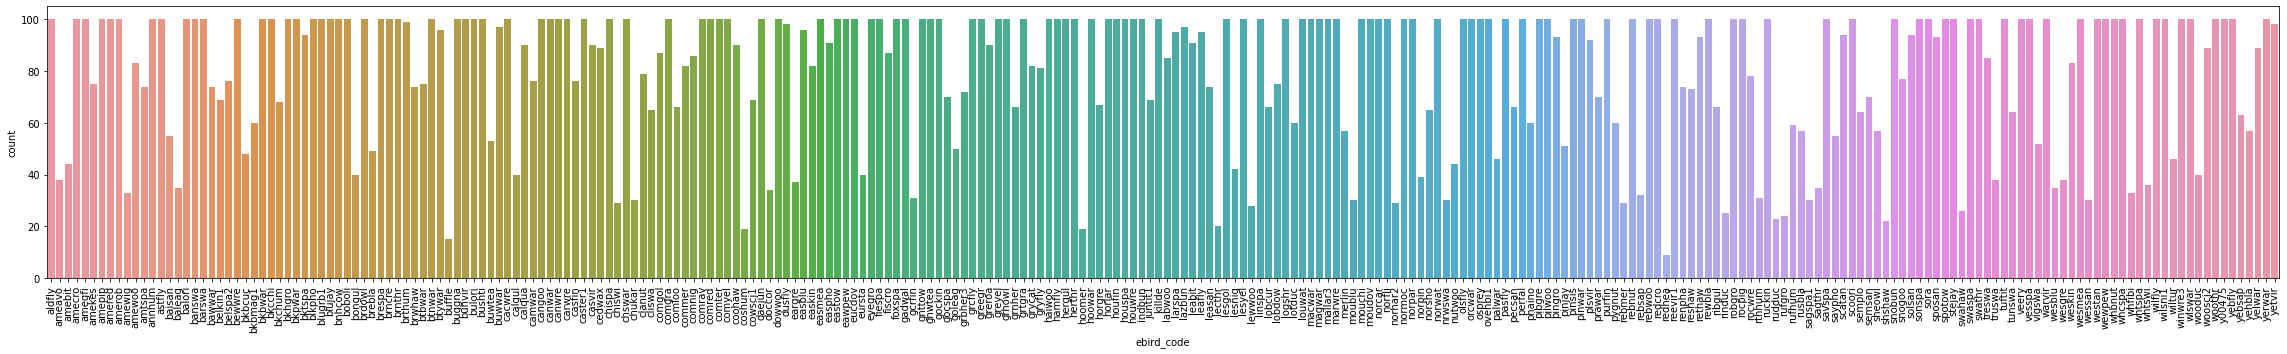

In [25]:
plt.figure(figsize=(40, 5))
sb.countplot(df_train['ebird_code'])
plt.xticks(rotation=90);

### species

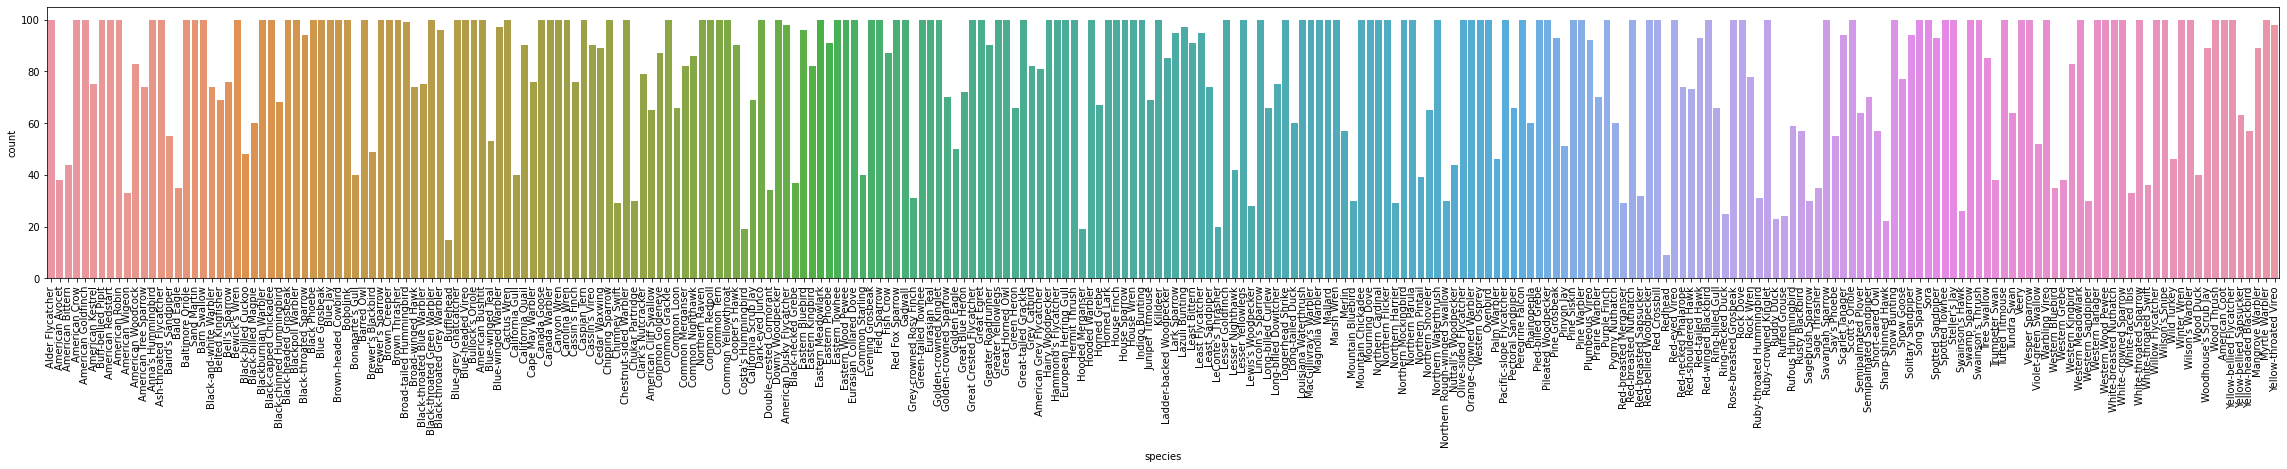

In [37]:
plt.figure(figsize=(40, 5))
sb.countplot(df_train['species'])
plt.xticks(rotation=90);

### sci_name

### type

### description

### background

In [57]:
df_train['background'].head()

0    American Yellow Warbler (Setophaga aestiva); L...
1                                                  NaN
2                                                  NaN
3    Grey Catbird (Dumetella carolinensis); Cedar W...
4                                                  NaN
Name: background, dtype: object

### xc_id

In [58]:
df_train['xc_id'].head()

0    134874
1    135454
2    135455
3    135456
4    135457
Name: xc_id, dtype: int64

### url

### author

### time

### recordist

### licence